<a href="https://colab.research.google.com/github/HARINIRODRIGO/AquaGuardian/blob/main/AquaGuardian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Create a Comet Experiment for YOLOv5

In [ ]:
from dataclasses import dataclass

# Define a data class for dataset configuration.
@dataclass(frozen=True)
class DatasetConfiguration:
    PROJECT_NAME = "aquaguardian-project"
    DATASET_NAME = "aquaguardian-renamed-dataset"
    API_KEY = "caGpjXQHyka6qwfde2ZP"
    DATA_YAML_PATH = "/content/yolov5/AquaGuardian-Renamed-Dataset-2/data.yaml"
    VERSION = 2

# Define a data class for CometML configuration.
@dataclass(frozen=True)
class CometMLConfiguration:
    API_KEY = "ySPV12eeUxljzCMnJaFTm8Ww9"
    PROJECT_NAME = "aquaguardian"
    WORKSPACE = "harini-rodrigo"

# Define a data class for training configuration.
@dataclass(frozen=True)
class TrainingConfiguration:
    MODEL_SIZE = "yolov5s-seg"
    EPOCHS = 20
    IMG_SIZE = 640
    BATCH_SIZE = 10


In [ ]:
!pip install comet_ml

import comet_ml
import os

# Create an experiment with the API key
experiment = comet_ml.Experiment(
    api_key=CometMLConfiguration.API_KEY,
    project_name=CometMLConfiguration.PROJECT_NAME,
    workspace=CometMLConfiguration.WORKSPACE,
    auto_param_logging=True,
    auto_metric_logging=True,
    auto_histogram_weight_logging=True,
    auto_histogram_gradient_logging=True,
    auto_histogram_activation_logging=True,
    auto_histogram_epoch_rate=True,
    log_code=True,
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/harini-rodrigo/aquaguardian/ed5fb81361074531af7c702fea51d008



In [ ]:
%pip install comet_ml --quiet
from comet_ml import Experiment

# Initialize a Comet experiment
experiment = Experiment(api_key=CometMLConfiguration.API_KEY, project_name=CometMLConfiguration.PROJECT_NAME, workspace=CometMLConfiguration.WORKSPACE)

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/harini-rodrigo/aquaguardian/ed5fb81361074531af7c702fea51d008
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 2
COMET INFO:     os packages         : 1
COMET INFO:     source_code         : 1
COMET INFO: 
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Re

## Setting up YOLOv5 and Dependencies

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt
%pip install -qr requirements.txt comet_ml

import torch
import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-218-g9e97ac3 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


##  Downloading Pretrained YOLOv5s Model Weights

In [ ]:
from utils.downloads import attempt_download

attempt_download(f'/yolov5/weights/{TrainingConfiguration.MODEL_SIZE}.pt') # download the model weights
print(f"Downloaded {TrainingConfiguration.MODEL_SIZE}.pt weights successfully!")

100%|██████████| 14.9M/14.9M [00:00<00:00, 30.4MB/s]



Downloaded yolov5s-seg.pt weights successfully!


## Download the Custom Dataset

In [ ]:
!pip install roboflow
from roboflow import Roboflow

rf = Roboflow(api_key=DatasetConfiguration.API_KEY)
workspace = rf.workspace(DatasetConfiguration.PROJECT_NAME).project(DatasetConfiguration.DATASET_NAME)

# Download YOLOv5 format dataset
dataset = workspace.version(DatasetConfiguration.VERSION).download("yolov5")

print("\nDataset downloaded successfully!")

### Extracting Relevant Information from data.yaml

In [ ]:
import yaml

# Read the data.yaml file
with open(DatasetConfiguration.DATA_YAML_PATH, 'r') as file:
    data_yaml = yaml.safe_load(file)

# Extract relevant information
class_names = data_yaml.get('names', [])
num_classes = data_yaml.get('nc')
roboflow_info = data_yaml.get('roboflow', {})
roboflow_url = roboflow_info.get('url')
dataset_version = roboflow_info.get('version')

print("Class Names:", class_names)
print("Number of Classes:", num_classes)
print("Public Dataset Access URL:", roboflow_url)
print("Dataset Version:", dataset_version)

Class Names: ['animal', 'plant', 'rov', 'trash', 'trash_unknown_instance']
Number of Classes: 5
Public Dataset Access URL: https://universe.roboflow.com/aquaguardian-project/aquaguardian-renamed-dataset/dataset/2
Dataset Version: 2


## COMET ML and YOLOv5 Training and Analysis of Dataset

In [ ]:
!python '/content/yolov5/train.py' \
--img $IMG_SIZE \
--batch $BATCH_SIZE \
--epochs $EPOCHS \
--data $DATA_YAML_PATH \
--weights yolov5s.pt \
--bbox_interval 1 \
--upload_dataset '/content/yolov5/AquaGuardian-Renamed-Dataset-2/train' ; \
python train.py --weights {MODEL_SIZE}.pt --img-size {IMG_SIZE} --batch-size {BATCH_SIZE} --epochs {EPOCHS} --data {DATA_YAML_PATH} --cfg models/yolov5s.yaml --name custom_yolov5s

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/AquaGuardian-Renamed-Dataset-2/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=10, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=/content/yolov5/AquaGuardian-Renamed-Dataset-2/train, bbox_interval=1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-218-g9e97ac3 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=

### Uploading Experiment Results to COMET ML to Watch Offline

In [ ]:
import os

os.environ['COMET_API_KEY'] = CometMLConfiguration.API_KEY
!comet upload /content/yolov5/.cometml-runs/210bda8aaad44ac2b4e363bfc5b036f4.zip

COMET INFO: Attempting to upload '/content/yolov5/.cometml-runs/210bda8aaad44ac2b4e363bfc5b036f4.zip'...
COMET INFO: Starting the upload of the experiment
COMET INFO: Uploading metrics, params, and assets to Comet before program termination (may take several seconds)
COMET INFO: Waiting for completion of the file uploads (may take several seconds)
COMET INFO: Still uploading 47 file(s), remaining 11.22 MB/34.24 MB
COMET INFO: The offline experiment has been uploaded on comet.com https://www.comet.com/harini-rodrigo/yolov5/210bda8aaad44ac2b4e363bfc5b036f4

COMET INFO: Offline Experiment will now be processed---may take some time to appear on the Comet dashboard.
COMET INFO:     Done!
COMET INFO: Number of uploaded experiments: 1


## Setting up YOLO-NAS and Installing Required Packages

In [ ]:
MODEL_ARCH = 'yolo_nas_s'

In [ ]:
import os

# Set up the Working Directory
HOME = os.getcwd()
print("Current working directory:", HOME)

Current working directory: /content


In [ ]:
# Install Required Packages
!pip install super-gradients==3.2.0
!pip install imutils
!pip install roboflow
!pip install pytube --upgrade

  Using cached pyparsing-2.4.5-py2.py3-none-any.whl (67 kB)
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 2.4.7
    Uninstalling pyparsing-2.4.7:
      Successfully uninstalled pyparsing-2.4.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
roboflow 1.1.6 requires pyparsing==2.4.7, but you have pyparsing 2.4.5 which is incompatible.


  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 2.4.5
    Uninstalling pyparsing-2.4.5:
      Successfully uninstalled pyparsing-2.4.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
super-gradients 3.2.0 requires pyparsing==2.4.5, but you have pyparsing 2.4.7 which is incompatible.


In [ ]:
import torch

# Check if a CUDA-compatible GPU is available and set the DEVICE accordingly.
DEVICE = 'cuda' if torch.cuda.is_available() else 'cuda'
print(f"Using device: {DEVICE}")
print(f"Selected YOLO-NAS model architecture: {MODEL_ARCH}")

Using device: cuda
Selected YOLO-NAS model architecture: yolo_nas_s


In [ ]:
from super_gradients.training import models

model = models.get(MODEL_ARCH, pretrained_weights="coco").to(DEVICE)

[2023-09-17 05:57:51] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it


The console stream is logged into /root/sg_logs/console.log


[2023-09-17 05:57:54] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-09-17 05:58:00] INFO - utils.py - NumExpr defaulting to 2 threads.
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
[2023-09-17 05:58:01] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-09-17 05:58:01] WARNING - export.py - Failed to import pytorch_quantization
[2023-09-17 05:58:01] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-09-17 05:58:01] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_s_coco.pth" to 

In [ ]:
data_dir = f"{HOME}/data"
print("Data Directory Path:", data_dir)

# Change the current working directory to the 'HOME' directory.
%cd {HOME}
!mkdir {HOME}/data
%cd {HOME}/data

In [ ]:
!wget -q https://media.roboflow.com/notebooks/examples/dog.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-2.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-3.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-4.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-5.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-6.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-7.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-8.jpeg

Data Directory Path: /content/data
/content
/content/data


In [ ]:
SOURCE_IMAGE_PATH = f"{HOME}/data/dog-7.jpeg"

In [ ]:
import cv2

image = cv2.imread(SOURCE_IMAGE_PATH)
result = list(model.predict(image, conf=0.35))[0]

[2023-09-17 06:00:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


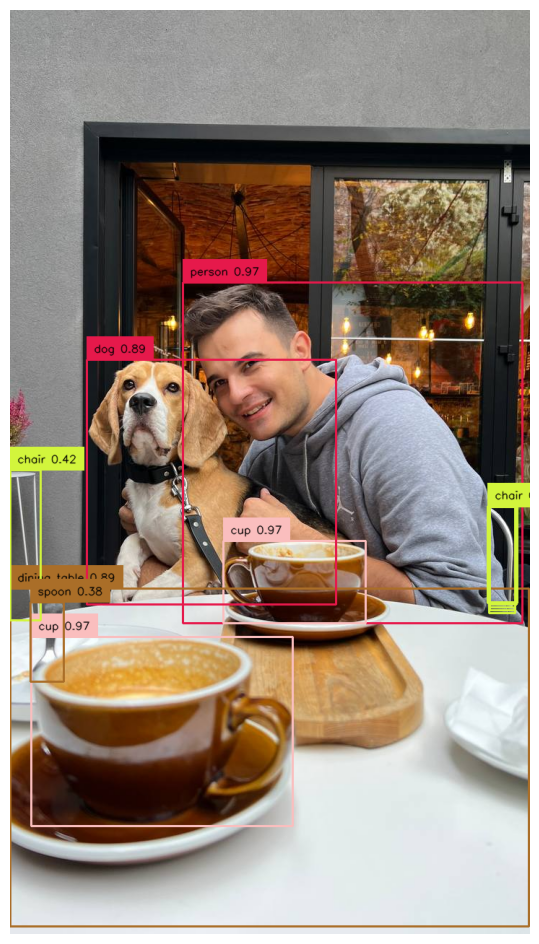

In [ ]:
import supervision as sv

detections = sv.Detections(
    xyxy=result.prediction.bboxes_xyxy,
    confidence=result.prediction.confidence,
    class_id=result.prediction.labels.astype(int)
)

box_annotator = sv.BoxAnnotator()

labels = [
    f"{result.class_names[class_id]} {confidence:0.2f}"
    for _, _, confidence, class_id, _
    in detections
]

annotated_frame = box_annotator.annotate(
    scene=image.copy(),
    detections=detections,
    labels=labels
)

%matplotlib inline
sv.plot_image(annotated_frame, (12, 12))